In [15]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm

In [7]:
osig = pd.read_csv('../data/processed/ordered_siginfo.tsv', sep='\t', low_memory=False)#.merge(apc, on='sig_id', how='inner')
osig.head()

,sig_id,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,...,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig,APC
0,ABY001_A375_XH:BRD-A61304759:0.625:24,b15,0.66,0.625,uM,0.66 uM,24 h,24.0,h,A375,...,H15|H23,ABY001_A375_XH_X1_B15,ABY001_A375_XH_X1_B15:H15|ABY001_A375_XH_X1_B1...,NaN,ABY,tanespimycin,0.0,1.0,0.0,0.263963
1,ABY001_A375_XH:BRD-A61304759:0.625:3,b15,0.66,0.625,uM,0.66 uM,3 h,3.0,h,A375,...,P03|P07|P11,ABY001_A375_XH_X1_B15,ABY001_A375_XH_X1_B15:P03|ABY001_A375_XH_X1_B1...,NaN,ABY,tanespimycin,0.0,1.0,0.0,0.126818
2,ABY001_A375_XH:BRD-A61304759:10:24,b15,10.00,10.000,uM,10 uM,24 h,24.0,h,A375,...,H13|H17|H21,ABY001_A375_XH_X1_B15,ABY001_A375_XH_X1_B15:H13|ABY001_A375_XH_X1_B1...,NaN,ABY,tanespimycin,0.0,1.0,0.0,0.545588
3,ABY001_A375_XH:BRD-A61304759:10:3,b15,10.00,10.000,uM,10 uM,3 h,3.0,h,A375,...,P01|P05|P09,ABY001_A375_XH_X1_B15,ABY001_A375_XH_X1_B15:P01|ABY001_A375_XH_X1_B1...,NaN,ABY,tanespimycin,0.0,1.0,0.0,0.253248
4,ABY001_A375_XH:BRD-A61304759:2.5:24,b15,2.50,2.500,uM,2.5 uM,24 h,24.0,h,A375,...,H14|H18|H22,ABY001_A375_XH_X1_B15,ABY001_A375_XH_X1_B15:H14|ABY001_A375_XH_X1_B1...,NaN,ABY,tanespimycin,0.0,1.0,0.0,0.537649


In [ ]:
osig[['APC', 'cell_iname']]

In [21]:
osig[['APC', 'pert_dose', 'pert_time']].assign(log_dose = lambda x: np.log10(x.pert_dose)).corr('spearman')

,APC,pert_dose,pert_time,log_dose
APC,1.000000,0.165777,-0.005063,0.165777
pert_dose,0.165777,1.000000,-0.318140,1.000000
pert_time,-0.005063,-0.318140,1.000000,-0.318140
log_dose,0.165777,1.000000,-0.318140,1.000000


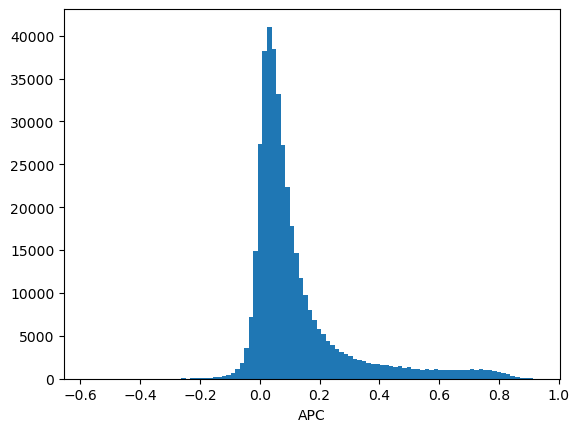

In [22]:
plt.figure()
plt.hist(osig.APC, bins=100)
plt.xlabel('APC')
plt.savefig('../results/APC_hist.png', dpi=300)
plt.show()

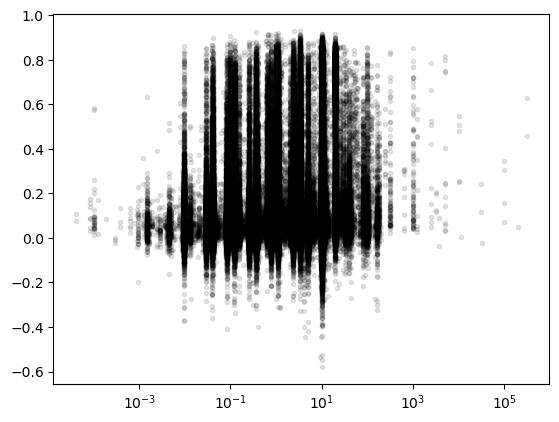

In [13]:
plt.figure()
plt.plot(osig.pert_dose, osig.APC, 'k.', alpha=0.1)
plt.xscale('log')
plt.show()